<a href="https://colab.research.google.com/github/MonaFaghfouri/Descriptive-data-analysis/blob/main/Hashtags_Filtered_By_Retweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from collections import defaultdict
from google.colab import files
from io import BytesIO
from datetime import datetime

# Upload the initial file
print("Please upload the initial Excel file...")
uploaded = files.upload()
filename = next(iter(uploaded))

# Read the Excel file
df = pd.read_excel(BytesIO(uploaded[filename]))

# Ensure the file has at least 4 columns
if df.shape[1] < 4:
    raise ValueError("The file must have at least four columns. The second column should contain text, the third column should contain date, and the fourth column should contain retweet count.")

# Convert date string to datetime
def parse_date(date_str):
    try:
        return datetime.strptime(str(date_str), '%a %b %d %H:%M:%S %z %Y')
    except:
        return pd.NaT

df['parsed_date'] = df.iloc[:, 2].apply(parse_date)
df = df.dropna(subset=['parsed_date'])

# Extract month name as three-letter abbreviation (e.g., Oct)
df['Month'] = df['parsed_date'].dt.strftime('%b')

# Function to extract hashtags
def extract_hashtags(text):
    if pd.isna(text):
        return []
    return re.findall(r'#\w+', str(text))

# Collect hashtags and their retweet counts by month
monthly_hashtags = defaultdict(lambda: defaultdict(int))
all_hashtags = set()

for _, row in df.iterrows():
    month = row['Month']
    text = row.iloc[1]  # Second column (text)
    retweet_count = row.iloc[3]  # Fourth column (retweet count)
    tags = extract_hashtags(text)
    for tag in tags:
        monthly_hashtags[month][tag] += int(retweet_count) if pd.notna(retweet_count) else 0
        all_hashtags.add(tag)

# Find hashtags that appear in at least two months
common_hashtags = []
hashtag_months = defaultdict(list)

for tag in all_hashtags:
    months = [month for month in monthly_hashtags if tag in monthly_hashtags[month]]
    if len(months) >= 2:
        common_hashtags.append(tag)
        hashtag_months[tag] = months

# Build output: Hashtag, Month, Retweet_Count
output_rows = []
for tag in common_hashtags:
    for month in monthly_hashtags:
        if tag in monthly_hashtags[month]:
            output_rows.append({
                'Hashtag': tag,
                'Month': month,
                'Retweet_Count': monthly_hashtags[month][tag]
            })

output_df = pd.DataFrame(output_rows)

# Pivot the table for better readability (Hashtags as rows, Months as columns)
pivot_df = output_df.pivot(index='Hashtag', columns='Month', values='Retweet_Count').fillna(0)

# Add a column for total retweets across all months
pivot_df['Total_Retweets'] = pivot_df.sum(axis=1)

# Sort by total retweets in descending order
pivot_df = pivot_df.sort_values('Total_Retweets', ascending=False)

# Save the output
output_filename = 'Common_Hashtags_Retweet_Comparison.xlsx'
pivot_df.to_excel(output_filename)
print(f"File '{output_filename}' created with comparison of common hashtags retweet counts across months.")

# Download the file
files.download(output_filename)

Please upload the initial Excel file...


Saving 4-2) tweets_cleaned-2.xlsx to 4-2) tweets_cleaned-2.xlsx
File 'Common_Hashtags_Retweet_Comparison.xlsx' created with comparison of common hashtags retweet counts across months.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# Upload the Excel file
uploaded_font = files.upload()

# Get the uploaded file name
filename = list(uploaded_font.keys())[0]

# Try reading the Excel file (handle cases with and without headers)
try:
    df = pd.read_excel(filename, header=None)
    # If the second column has strings, treat the first row as header
    if df.iloc[0, 1:].apply(lambda x: isinstance(x, str)).any():
        df = pd.read_excel(filename)
except Exception as e:
    print("Error reading file:", e)

# Rename the first column to 'Hashtag'
df.rename(columns={df.columns[0]: 'Hashtag'}, inplace=True)

# Convert other columns to numeric (invalid entries become NaN)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace NaN with 0
df.fillna(0, inplace=True)

# Calculate total frequency per hashtag
df['TotalFrequency'] = df.iloc[:, 1:].sum(axis=1)

# Sort by total frequency in descending order and select top 50
top_50 = df.sort_values(by='TotalFrequency', ascending=False).head(50)

# Save result to Excel
output_filename = 'top_50_hashtags.xlsx'
top_50.to_excel(output_filename, index=False)

# Download the file
files.download(output_filename)


Saving Common_Hashtags_Retweet_Comparison.xlsx to Common_Hashtags_Retweet_Comparison (2).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 9.3 MB/s eta 0:00:00
Please upload the B-Nazanin.ttf file


Saving Vazir.ttf to Vazir.ttf
Error loading font: [Errno 2] No such file or directory: 'B-Nazanin.ttf'
Using default font (Persian text may not display correctly).
Please upload the Excel file


Saving top_50_hashtags_Common_Hashtags_Retweet_Comparison.xlsx to top_50_hashtags_Common_Hashtags_Retweet_Comparison.xlsx
Heatmap successfully saved as hashtag_heatmap_final.png


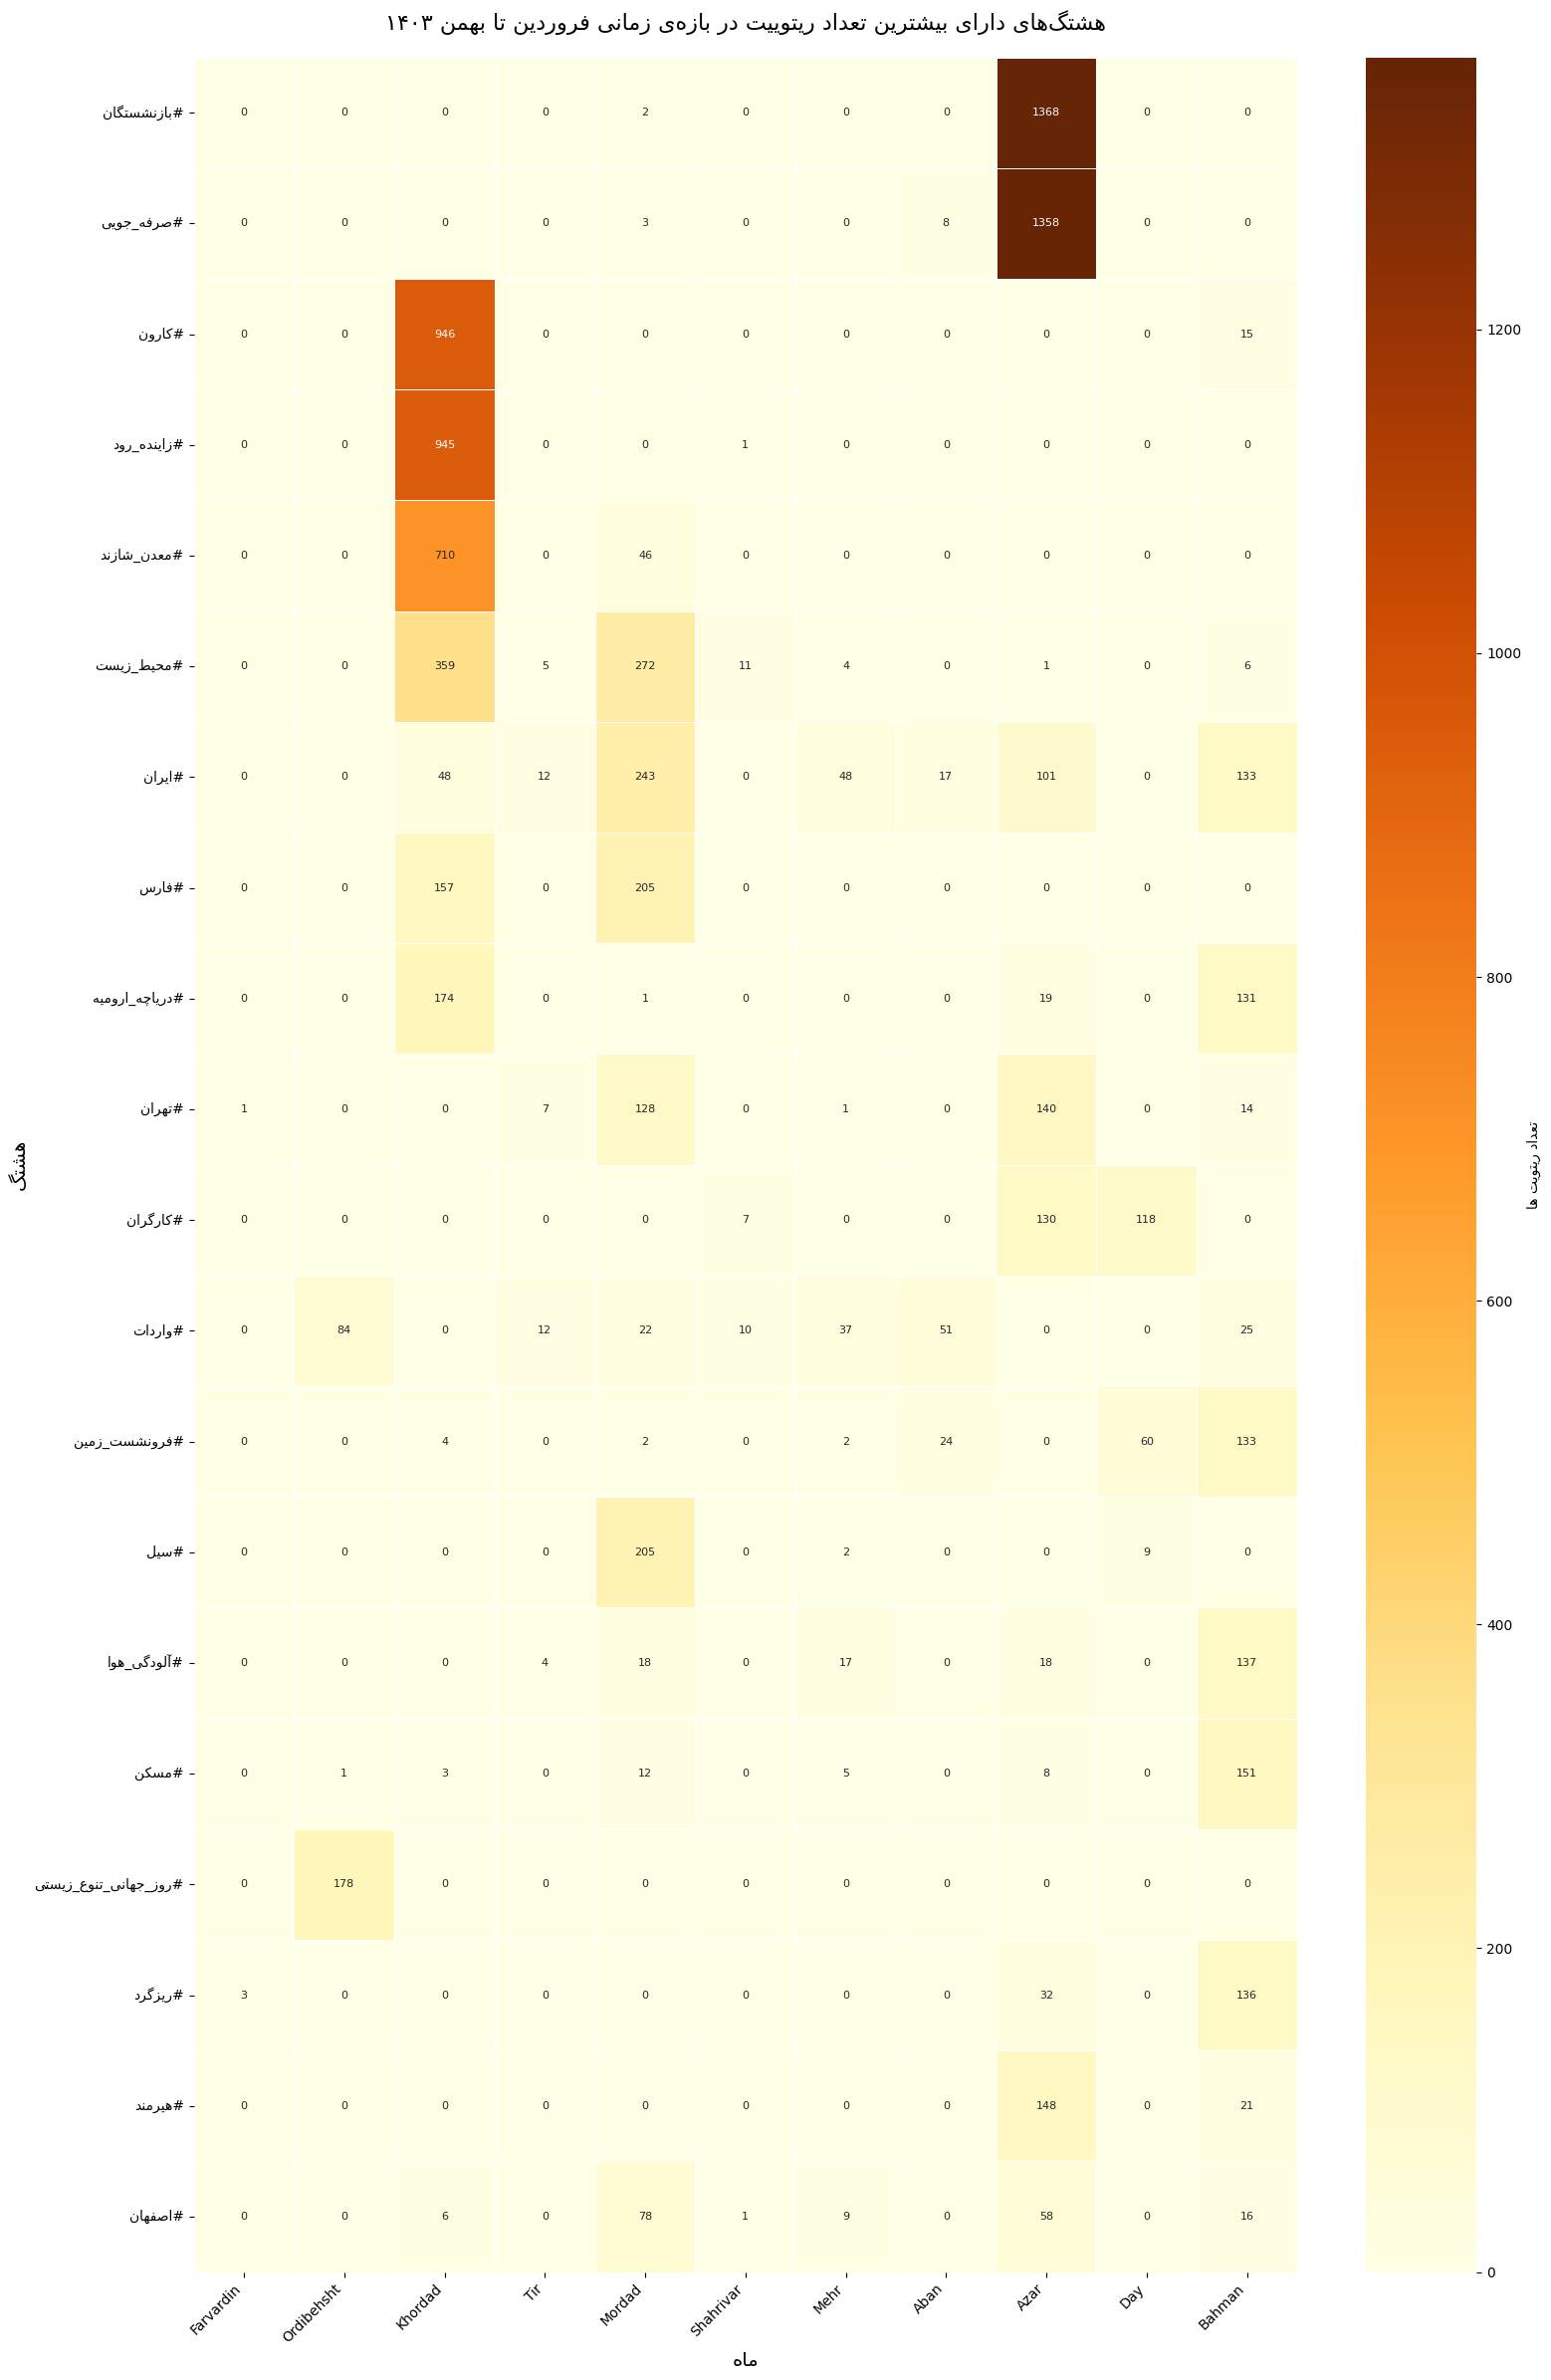

In [ ]:
# Install required libraries (only for Google Colab)
!pip install arabic-reshaper python-bidi

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.font_manager as fm
import os

# Upload B Nazanin font file
print("Please upload the B-Nazanin.ttf file")
uploaded_font = files.upload()
font_path = 'B-Nazanin.ttf'

# Add font to matplotlib with error handling
try:
    fm.fontManager.addfont(font_path)
    plt.rcParams['font.family'] = 'B Nazanin'
    plt.rcParams['axes.unicode_minus'] = False
    print("B Nazanin font successfully loaded.")
except Exception as e:
    print(f"Error loading font: {e}")
    print("Using default font (Persian text may not display correctly).")
    plt.rcParams['font.family'] = 'DejaVu Sans'

# Upload the Excel file
print("Please upload the Excel file")
uploaded = files.upload()

# Read the file
filename = list(uploaded.keys())[0]
try:
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
except Exception as e:
    print(f"Error reading Excel file: {e}")
    raise

# Set Hashtag as index
df.set_index('Hashtag', inplace=True)

# Sort months in chronological order
month_order = ['Farvardin', 'Ordibehsht', 'Khordad', 'Tir', 'Mordad', 'Shahrivar', 'Mehr', 'Aban', 'Azar', 'Day', 'Bahman']

df = df[month_order]

# Reshape Persian hashtags for correct display
reshaped_hashtags = [get_display(arabic_reshaper.reshape(str(hashtag))) for hashtag in df.index]
df.index = reshaped_hashtags

# Transpose the dataframe to have months as columns and hashtags as rows
df = df.transpose()

# Create heatmap with rotated orientation
plt.figure(figsize=(16, 24))
heatmap = sns.heatmap(df.T,  # Transpose again to get desired orientation
            cmap='YlOrBr',
            annot=True,
            fmt='d',
            annot_kws={'size': 8},
            linewidths=0.5,
            cbar_kws={'label': get_display(arabic_reshaper.reshape('تعداد ریتویت ها'))},
            square=False)

# Set labels with Persian text support
plt.xlabel(get_display(arabic_reshaper.reshape('ماه')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('هشتگ')), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape('هشتگ‌های دارای بیشترین تعداد ریتوییت در بازه‌ی زمانی فروردین تا بهمن ۱۴۰۳')), fontsize=16, pad=20)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Save heatmap
plt.savefig('hashtag_heatmap_final.png', bbox_inches='tight', dpi=300)
print("Heatmap successfully saved as hashtag_heatmap_final.png")

# Show plot
plt.show()